In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os


In [ ]:
df = pd.read_csv("iris.csv")
df.head()

In [10]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df.columns = ['sepal_len','sepal_wid','petal_len','petal_wid',"species"]
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,49


In [14]:
df.isnull().sum()

,0
sepal_len,0
sepal_wid,0
petal_len,0
petal_wid,0
species,0


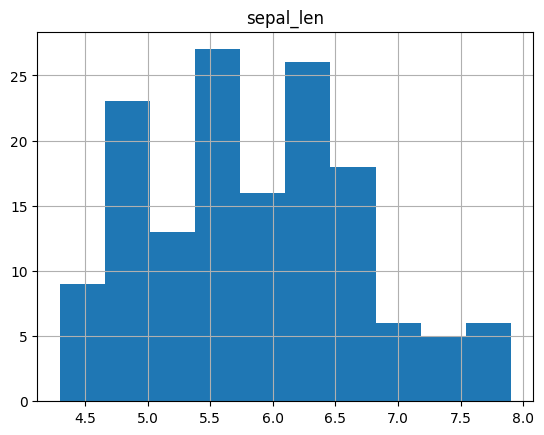

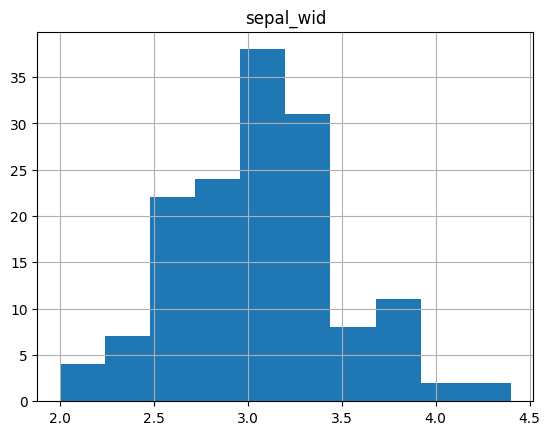

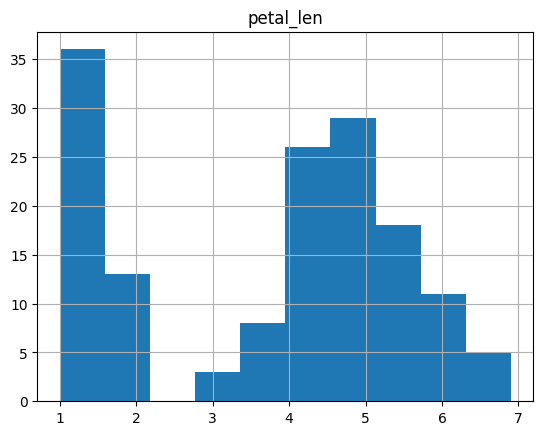

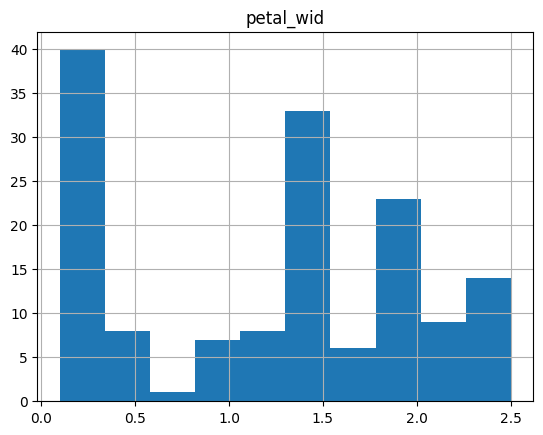

In [18]:
for cols in ['sepal_len','sepal_wid','petal_len','petal_wid']:
  df[cols].hist()
  plt.title(cols)
  plt.show()

In [19]:
colors = ['red','orange','blue']
species  = ['Iris-virginica','Iris-versicolor','Iris-setosa']


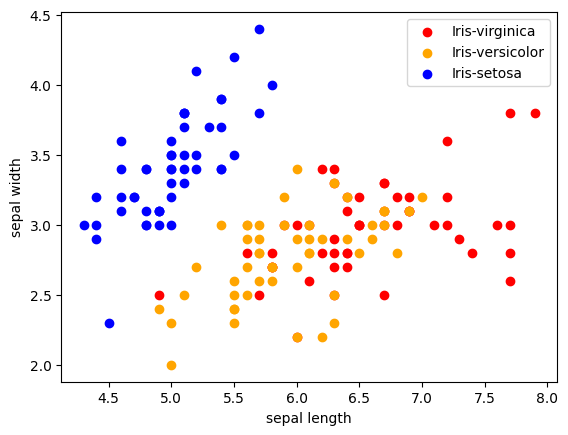

In [22]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_len'],x['sepal_wid'],c= colors[i],label = species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


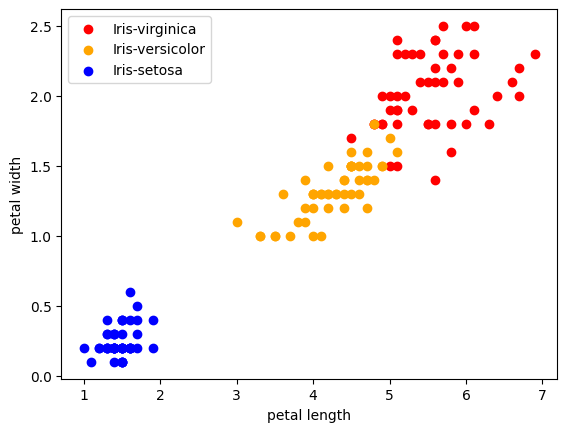

In [23]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_len'],x['petal_wid'],c= colors[i],label = species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

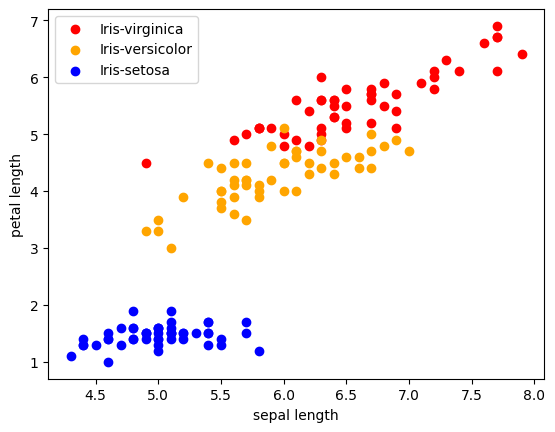

In [25]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_len'],x['petal_len'],c= colors[i],label = species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()

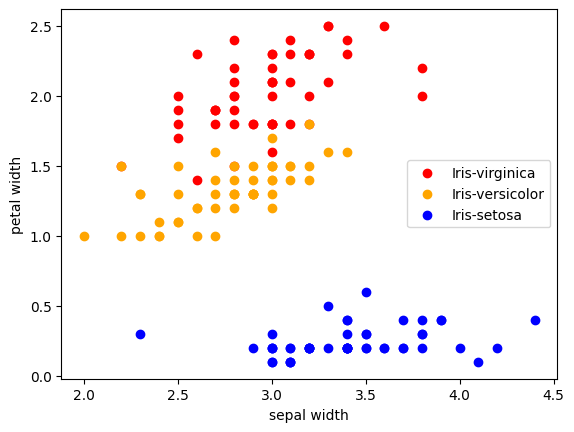

In [27]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_wid'],x['petal_wid'],c= colors[i],label = species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [32]:
df.select_dtypes(include=np.number).corr() # used to include only numeric values for the correlation

,sepal_len,sepal_wid,petal_len,petal_wid
sepal_len,1.000000,-0.103784,0.871283,0.816971
sepal_wid,-0.103784,1.000000,-0.415218,-0.350733
petal_len,0.871283,-0.415218,1.000000,0.962314
petal_wid,0.816971,-0.350733,0.962314,1.000000


<Axes: >

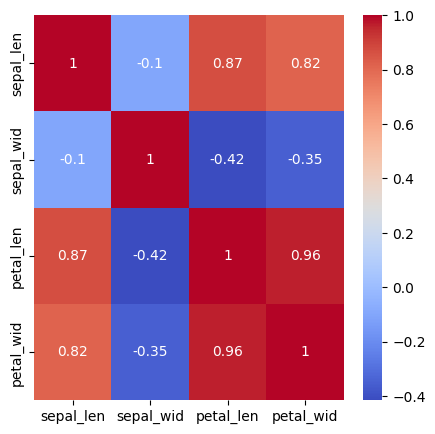

In [41]:
corr = df.select_dtypes(include=np.number).corr()
fig ,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,ax=ax,cmap = 'coolwarm')


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [49]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='species')
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [51]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()


In [52]:
model.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9333333333333333
